In [1]:
import geopandas as gpd

In [2]:
import math

In [3]:
import numpy as np

In [4]:
import contextily as cx

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib_scalebar.scalebar import ScaleBar

In [6]:
shape_dk= gpd.read_file('gaz/dakar_esri.shp')

In [7]:
#file= gpd.read_file('era5_test/timeseries_ERA5.shp')

In [8]:
#file= gpd.read_file('era5_test/timeseries_ERA5.shp')

In [9]:
shape_dk.to_crs(epsg=32628,inplace=True)
shape_dk.crs

<Derived Projected CRS: EPSG:32628>
Name: WGS 84 / UTM zone 28N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 18°W and 12°W, northern hemisphere between equator and 84°N, onshore and offshore. Gambia. Greenland. Guinea. Guinea-Bissau. Iceland. Ireland - offshore Porcupine Basin. Mauritania. Morocco. Senegal. Sierra Leone. Western Sahara.
- bounds: (-18.0, 0.0, -12.0, 84.0)
Coordinate Operation:
- name: UTM zone 28N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
shape_dk

,CODE,HEIGHT,H_STDEV,VEL,V_STDEV,COHERENCE,EFF_AREA,D20190109,D20190121,D20190202,...,D20210721,D20210802,D20210814,D20210826,D20210907,D20210919,D20211001,D20211013,D20211025,geometry
0,000282e7,30.88,0.0,-23.90,0.91,1.0,1,0.55,6.06,1.49,...,-53.73,-35.55,-68.86,-49.63,-56.76,-60.14,-67.08,-51.52,-70.94,POINT (252440.000 1640120.000)
1,000282e8,31.35,0.0,-20.51,0.88,1.0,1,-0.69,4.65,1.17,...,-53.06,-35.16,-65.66,-46.46,-44.82,-43.22,-47.39,-30.56,-48.97,POINT (252520.000 1640120.000)
2,000282e9,32.03,0.0,-12.78,1.30,1.0,1,-1.37,4.54,0.91,...,-26.98,-9.07,-42.98,-27.10,-32.88,-34.14,-36.42,-22.27,-42.30,POINT (252600.000 1640120.000)
3,000282ea,33.08,0.0,-16.87,1.09,1.0,1,-0.62,5.08,1.53,...,-38.80,-20.68,-56.40,-37.60,-44.99,-43.86,-48.39,-29.26,-50.17,POINT (252680.000 1640120.000)
4,000282eb,34.63,0.0,-18.84,0.98,1.0,1,0.14,5.66,2.36,...,-39.02,-22.39,-50.35,-35.17,-42.87,-42.76,-51.14,-32.89,-53.54,POINT (252760.000 1640120.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39148,00089a59,30.39,0.0,-0.34,0.68,1.0,1,4.19,1.19,4.51,...,-6.29,6.37,-6.95,-7.98,7.22,-3.54,-6.65,-5.87,0.59,POINT (237640.000 1620760.000)
39149,00089a5a,32.44,0.0,1.42,0.61,1.0,1,2.49,1.93,4.99,...,0.68,14.10,1.93,0.77,13.25,3.22,-0.32,-0.60,8.51,POINT (237720.000 1620760.000)
39150,00089a5b,35.98,0.0,-2.09,0.58,1.0,1,1.99,1.49,4.42,...,-5.67,7.77,-6.17,-7.59,4.12,-7.99,-10.93,-11.24,-3.20,POINT (237800.000 1620760.000)
39151,00089a5c,40.57,0.0,-4.09,0.75,1.0,1,0.32,-0.82,2.68,...,-11.36,2.35,-13.95,-10.80,0.82,-10.95,-11.90,-14.79,-5.56,POINT (237880.000 1620760.000)


<AxesSubplot:>

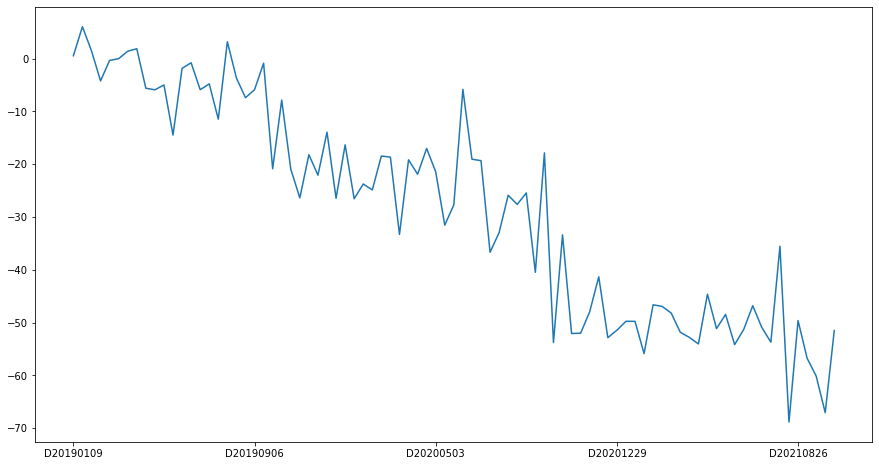

In [11]:
shape_dk.loc[0][7:92].plot(figsize=(15,8))

<AxesSubplot:>

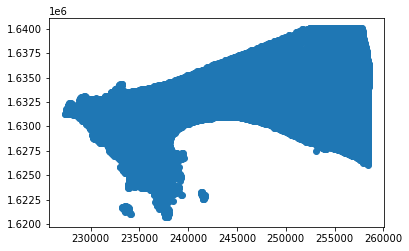

In [12]:
shape_dk['geometry'].plot()

In [13]:
file = shape_dk[['VEL','geometry','V_STDEV']]
fil = file[abs(file['VEL']) > 10]
#fil = fil[abs(fil['VEL']) > 2/np.cos(34*math.pi/180)]

<AxesSubplot:>

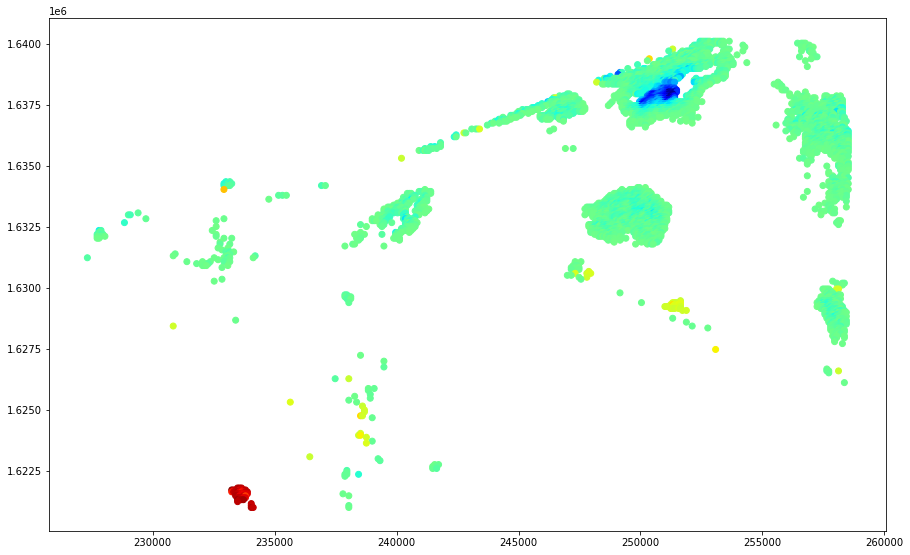

In [14]:
fig,ax = plt.subplots(figsize=(15,20))
fil.plot(ax=ax,cmap='jet',column=fil['VEL'],aspect=1)

In [16]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable


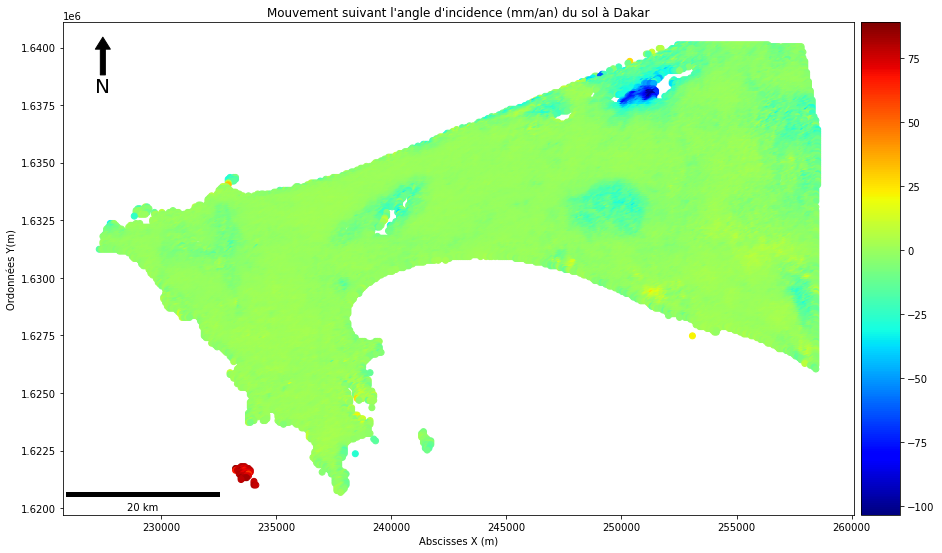

In [17]:
fig1,ax1 = plt.subplots(1,1,figsize=(15,20))

ax1.set_xlabel('Abscisses X (m)')
ax1.set_ylabel('Ordonnées Y(m)')
ax1.set_title('Mouvement suivant l\'angle d\'incidence (mm/an) du sol à Dakar')

divider = make_axes_locatable(ax1)

cax = divider.append_axes("right", size="5%", pad=0.1)

#world.plot(column='pop_est', ax=ax, legend=True, cax=cax)
file.plot(ax=ax1,cmap='jet',column=file['VEL'],legend=True,cax=cax)
# Flèche Nord
x, y, arrow_length = 0.05, 0.97, 0.1
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)

ax1.add_artist(ScaleBar(3,box_alpha = 0.1,location='lower left'))
plt.savefig('MintPY_Dakar1.png')
plt.show()

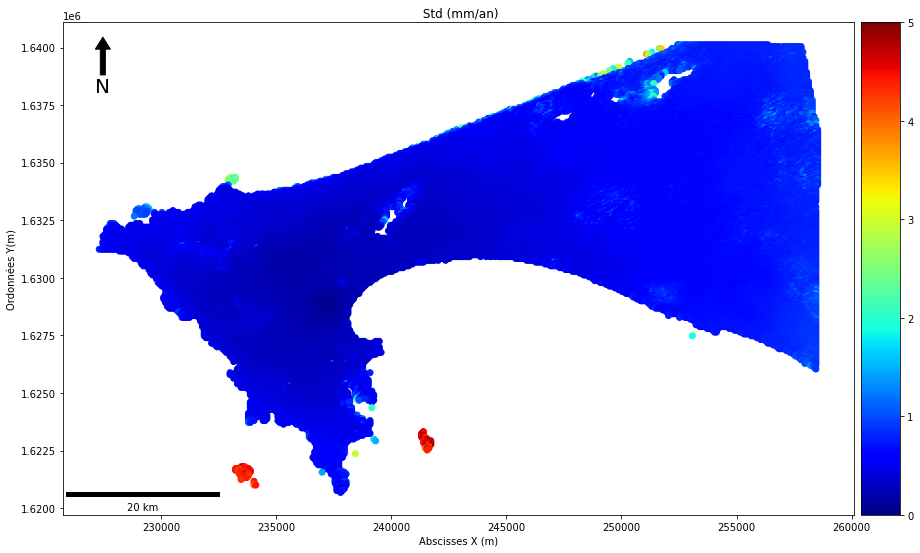

In [16]:
fig_1,ax_1 = plt.subplots(1,1,figsize=(15,20))

ax_1.set_xlabel('Abscisses X (m)')
ax_1.set_ylabel('Ordonnées Y(m)')
ax_1.set_title(' Std (mm/an)')

divider = make_axes_locatable(ax_1)

ca_x = divider.append_axes("right", size="5%", pad=0.1)

#world.plot(column='pop_est', ax=ax, legend=True, cax=cax)
file.plot(ax=ax_1,cmap='jet',column=file['V_STDEV'],legend=True,cax=ca_x)
# Flèche Nord
x_, y_, arrow_length_ = 0.05, 0.97, 0.1
ax_1.annotate('N', xy=(x_, y_), xytext=(x_, y_-arrow_length_),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax_1.transAxes)

ax_1.add_artist(ScaleBar(3,box_alpha = 0.1,location='lower left'))
plt.savefig('MintPY_Dakar_STDEV.png')
plt.show()

In [17]:
#fil.plot()

In [18]:
file_dk= gpd.read_file('dakar_ngao53/dakar.shp')

In [19]:
file_dk.to_crs(epsg=32628,inplace=True)
#epsg=4326 wgs84

In [20]:
file_dk.crs

<Derived Projected CRS: EPSG:32628>
Name: WGS 84 / UTM zone 28N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 18°W and 12°W, northern hemisphere between equator and 84°N, onshore and offshore. Gambia. Greenland. Guinea. Guinea-Bissau. Iceland. Ireland - offshore Porcupine Basin. Mauritania. Morocco. Senegal. Sierra Leone. Western Sahara.
- bounds: (-18.0, 0.0, -12.0, 84.0)
Coordinate Operation:
- name: UTM zone 28N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

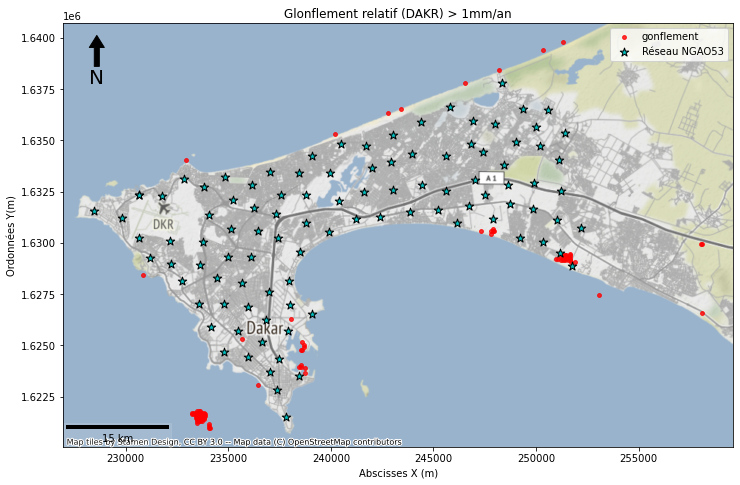

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
fil[fil['VEL'] > 1].plot(ax=ax,color='r',marker='o',markersize=15,alpha=0.8,aspect=2,label='gonflement')
#fil[fil['VEL']*10 < -30].plot(ax=ax,color='blue',marker='o',markersize=20,alpha=0.3)

figure=file_dk.plot(ax=ax,color='c',edgecolor='k',marker='*',markersize=80,label='Réseau NGAO53')
#cx.add_basemap(figure,zoom=2,source=cx.providers.Stamen.TonerLabels,crs= shape_dk.crs)
#cx.add_basemap(figure,crs= shape_dk.crs,source=cx.providers.Stamen.Watercolor)
#cx.add_basemap(figure,crs= shape_dk.crs,source=cx.providers.Stamen.TonerLabels)
cx.add_basemap(figure,crs= shape_dk.crs)
ax.legend()
ax.set_xlabel('Abscisses X (m)')
ax.set_ylabel('Ordonnées Y(m)')
ax.set_title('Glonflement relatif (DAKR) > 1mm/an')

# Flèche Nord
x, y, arrow_length = 0.05, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.add_artist(ScaleBar(3,box_alpha = 0.1,location='lower left'))
plt.savefig('uplift1.png')
plt.show()

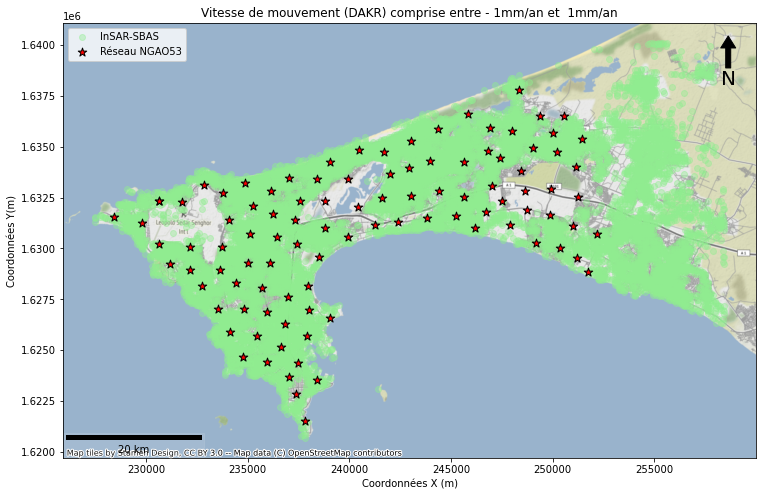

In [29]:
fig,ax = plt.subplots(figsize=(15,8))
file[(file['VEL'] < 1) & (file['VEL'] > -1)].plot(ax=ax,color='lightgreen',marker='o',alpha=0.4,label='InSAR-SBAS')
#fil[fil['VEL'] < -3/np.cos(34*math.pi/180)].plot(ax=ax,cmap='jet',marker='o',markersize=20,alpha=0.3,column=fil[fil['VEL'] < -3]['VEL'])
figure=file_dk.plot(ax=ax,color='r',edgecolor='k',marker='*',markersize=80,label='Réseau NGAO53')
ax.legend()
ax.set_xlabel('Coordonnées X (m)')
ax.set_ylabel('Coordonnées Y(m)')
ax.set_title('Vitesse de mouvement (DAKR) comprise entre - 1mm/an et  1mm/an')
#cx.add_basemap(figure,zoom=12,source=cx.providers.Stamen.TonerLabels)
#cx.add_basemap(figure,zoom=12,crs=shape_dk.crs,source=cx.providers.Stamen.Watercolor)
cx.add_basemap(figure,zoom=13,crs=shape_dk.crs)

# Flèche Nord
x, y, arrow_length = 0.96, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes) 
ax.add_artist(ScaleBar(3,box_alpha = 0.1,location='lower left'))
              
plt.savefig('subsidence-affaissement')
plt.show()

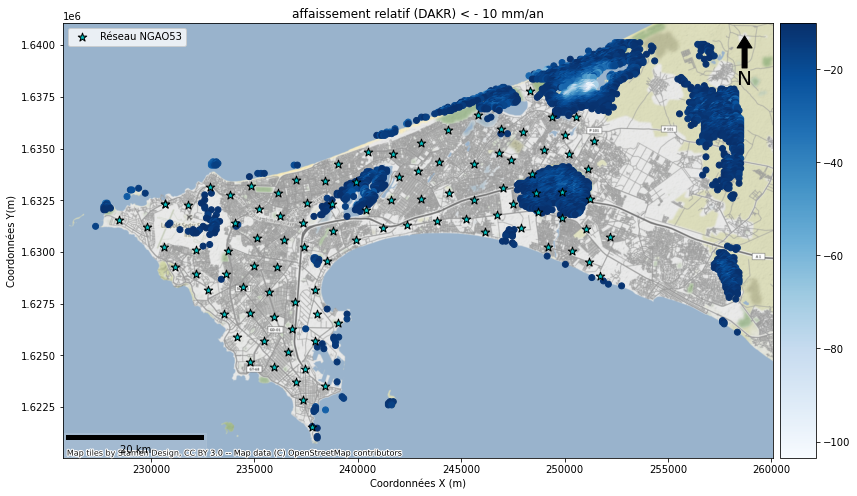

In [33]:
fig,ax = plt.subplots(figsize=(20,8))
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)
fil_= fil[fil['VEL'] < -10]
#world.plot(column='pop_est', ax=ax, legend=True, cax=cax)
fil_.plot(ax=ax,cmap='Blues',column=fil_['VEL'],legend=True,cax=cax)

#Øfil[fil['VEL'] < -10].plot(ax=ax,cmap='jet',alpha=0.4,label='affaissement',legend=True)
#fil[fil['VEL'] < -3/np.cos(34*math.pi/180)].plot(ax=ax,cmap='jet',marker='o',markersize=20,alpha=0.3,column=fil[fil['VEL'] < -3]['VEL'])
figure=file_dk.plot(ax=ax,color='c',edgecolor='k',marker='*',markersize=80,label='Réseau NGAO53')
ax.legend()
ax.set_xlabel('Coordonnées X (m)')
ax.set_ylabel('Coordonnées Y(m)')
ax.set_title('affaissement relatif (DAKR) < - 10 mm/an')
#cx.add_basemap(figure,zoom=12,source=cx.providers.Stamen.TonerLabels)
#cx.add_basemap(figure,zoom=12,crs=shape_dk.crs,source=cx.providers.Stamen.Watercolor)
cx.add_basemap(figure,zoom=13,crs=shape_dk.crs)
# Flèche Nord
x, y, arrow_length = 0.96, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
# Show
ax.add_artist(ScaleBar(3,box_alpha = 0.1,location='lower left'))
plt.savefig('zone instable1')
plt.show()

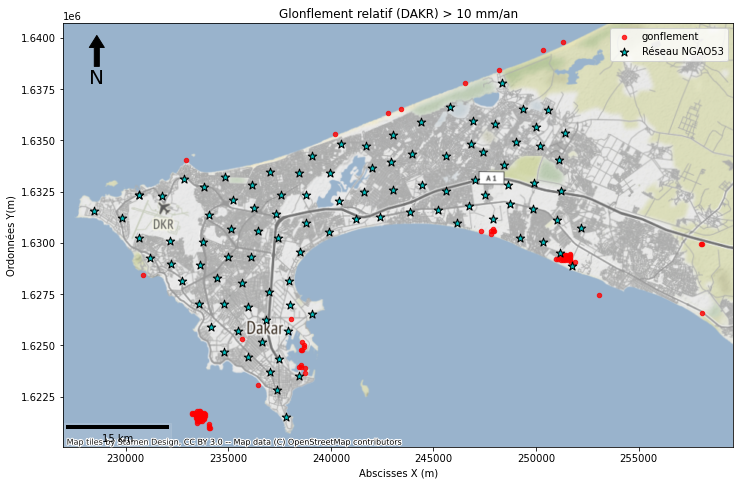

In [212]:
fig,ax = plt.subplots(figsize=(12,8))
fil[fil['VEL'] > 10].plot(ax=ax,color='r',marker='o',markersize=20,alpha=0.8,aspect=2,label='gonflement')
#fil[fil['VEL']*10 < -30].plot(ax=ax,color='blue',marker='o',markersize=20,alpha=0.3)

figure=file_dk.plot(ax=ax,color='c',edgecolor='k',marker='*',markersize=80,label='Réseau NGAO53')
#cx.add_basemap(figure,zoom=2,source=cx.providers.Stamen.TonerLabels,crs= shape_dk.crs)
#cx.add_basemap(figure,crs= shape_dk.crs,source=cx.providers.Stamen.Watercolor)
#cx.add_basemap(figure,crs= shape_dk.crs,source=cx.providers.Stamen.TonerLabels)
cx.add_basemap(figure,crs= shape_dk.crs)
ax.legend()
ax.set_xlabel('Abscisses X (m)')
ax.set_ylabel('Ordonnées Y(m)')
ax.set_title('Glonflement relatif (DAKR) > 10 mm/an')

# Flèche Nord
x, y, arrow_length = 0.05, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.add_artist(ScaleBar(3,box_alpha = 0.1,location='lower left'))
plt.savefig('uplift_intable.png')
plt.show()